In [1]:
from preprocessing.src.preprocess.consolidation import Consolidate
from preprocessing.src.preprocess.preprocess import Preprocess
from datetime import date
import pandas as pd

pd.set_option('display.max_columns',100)

/opt/conda/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
conso = Consolidate(bucket_name='sqm-data-bucket', context='vertex')
wells_data = conso.consolide_data(station_type='wells')
conso.save_to_parquet(wells_data, file_name='wells_data')

meteo_data = conso.consolide_data(station_type='meteo')
conso.save_to_parquet(meteo_data, file_name='meteo_data')

2025-05-03 21:26:48,601 - INFO - Initializing Consolidate in context: 'vertex'
2025-05-03 21:26:48,603 - INFO - Consolidating wells data
2025-05-03 21:26:48,605 - INFO - Listing files in GCS directory: 'gs://sqm-data-bucket/raw-data/wells'
2025-05-03 21:26:48,683 - INFO - Found 29 files in 'gs://sqm-data-bucket/raw-data/wells'.
2025-05-03 21:26:48,684 - INFO - Processing 29 files for wells.
2025-05-03 21:26:48,685 - INFO - Reading Excel file: 'gs://sqm-data-bucket/raw-data/wells/1028.xlsx'
2025-05-03 21:26:49,459 - INFO - Successfully read raw-data/wells/1028.xlsx with 2629 rows and 6 columns.
2025-05-03 21:26:49,489 - INFO - Reading Excel file: 'gs://sqm-data-bucket/raw-data/wells/L1-17.xlsx'
2025-05-03 21:26:50,001 - INFO - Successfully read raw-data/wells/L1-17.xlsx with 2474 rows and 7 columns.
2025-05-03 21:26:50,029 - INFO - Reading Excel file: 'gs://sqm-data-bucket/raw-data/wells/L1-3.xlsx'
2025-05-03 21:26:50,502 - INFO - Successfully read raw-data/wells/L1-3.xlsx with 2058 row

2025-05-04 14:52:17,357 - INFO - Initializing Preprocess in vertex context
2025-05-04 14:52:18,461 - INFO - Preprocessing data
2025-05-04 14:52:18,462 - INFO - - Preprocessing meteo data.
2025-05-04 14:52:18,474 - INFO - 	- Imputing missing values.
100%|██████████| 2/2 [00:00<00:00,  9.59it/s]
2025-05-04 14:52:18,692 - INFO - 	- Smotthing meteo data.
2025-05-04 14:52:18,703 - INFO - 	- Smotthing meteo data.


Forecast smooth for EST. METEO. CHAXA


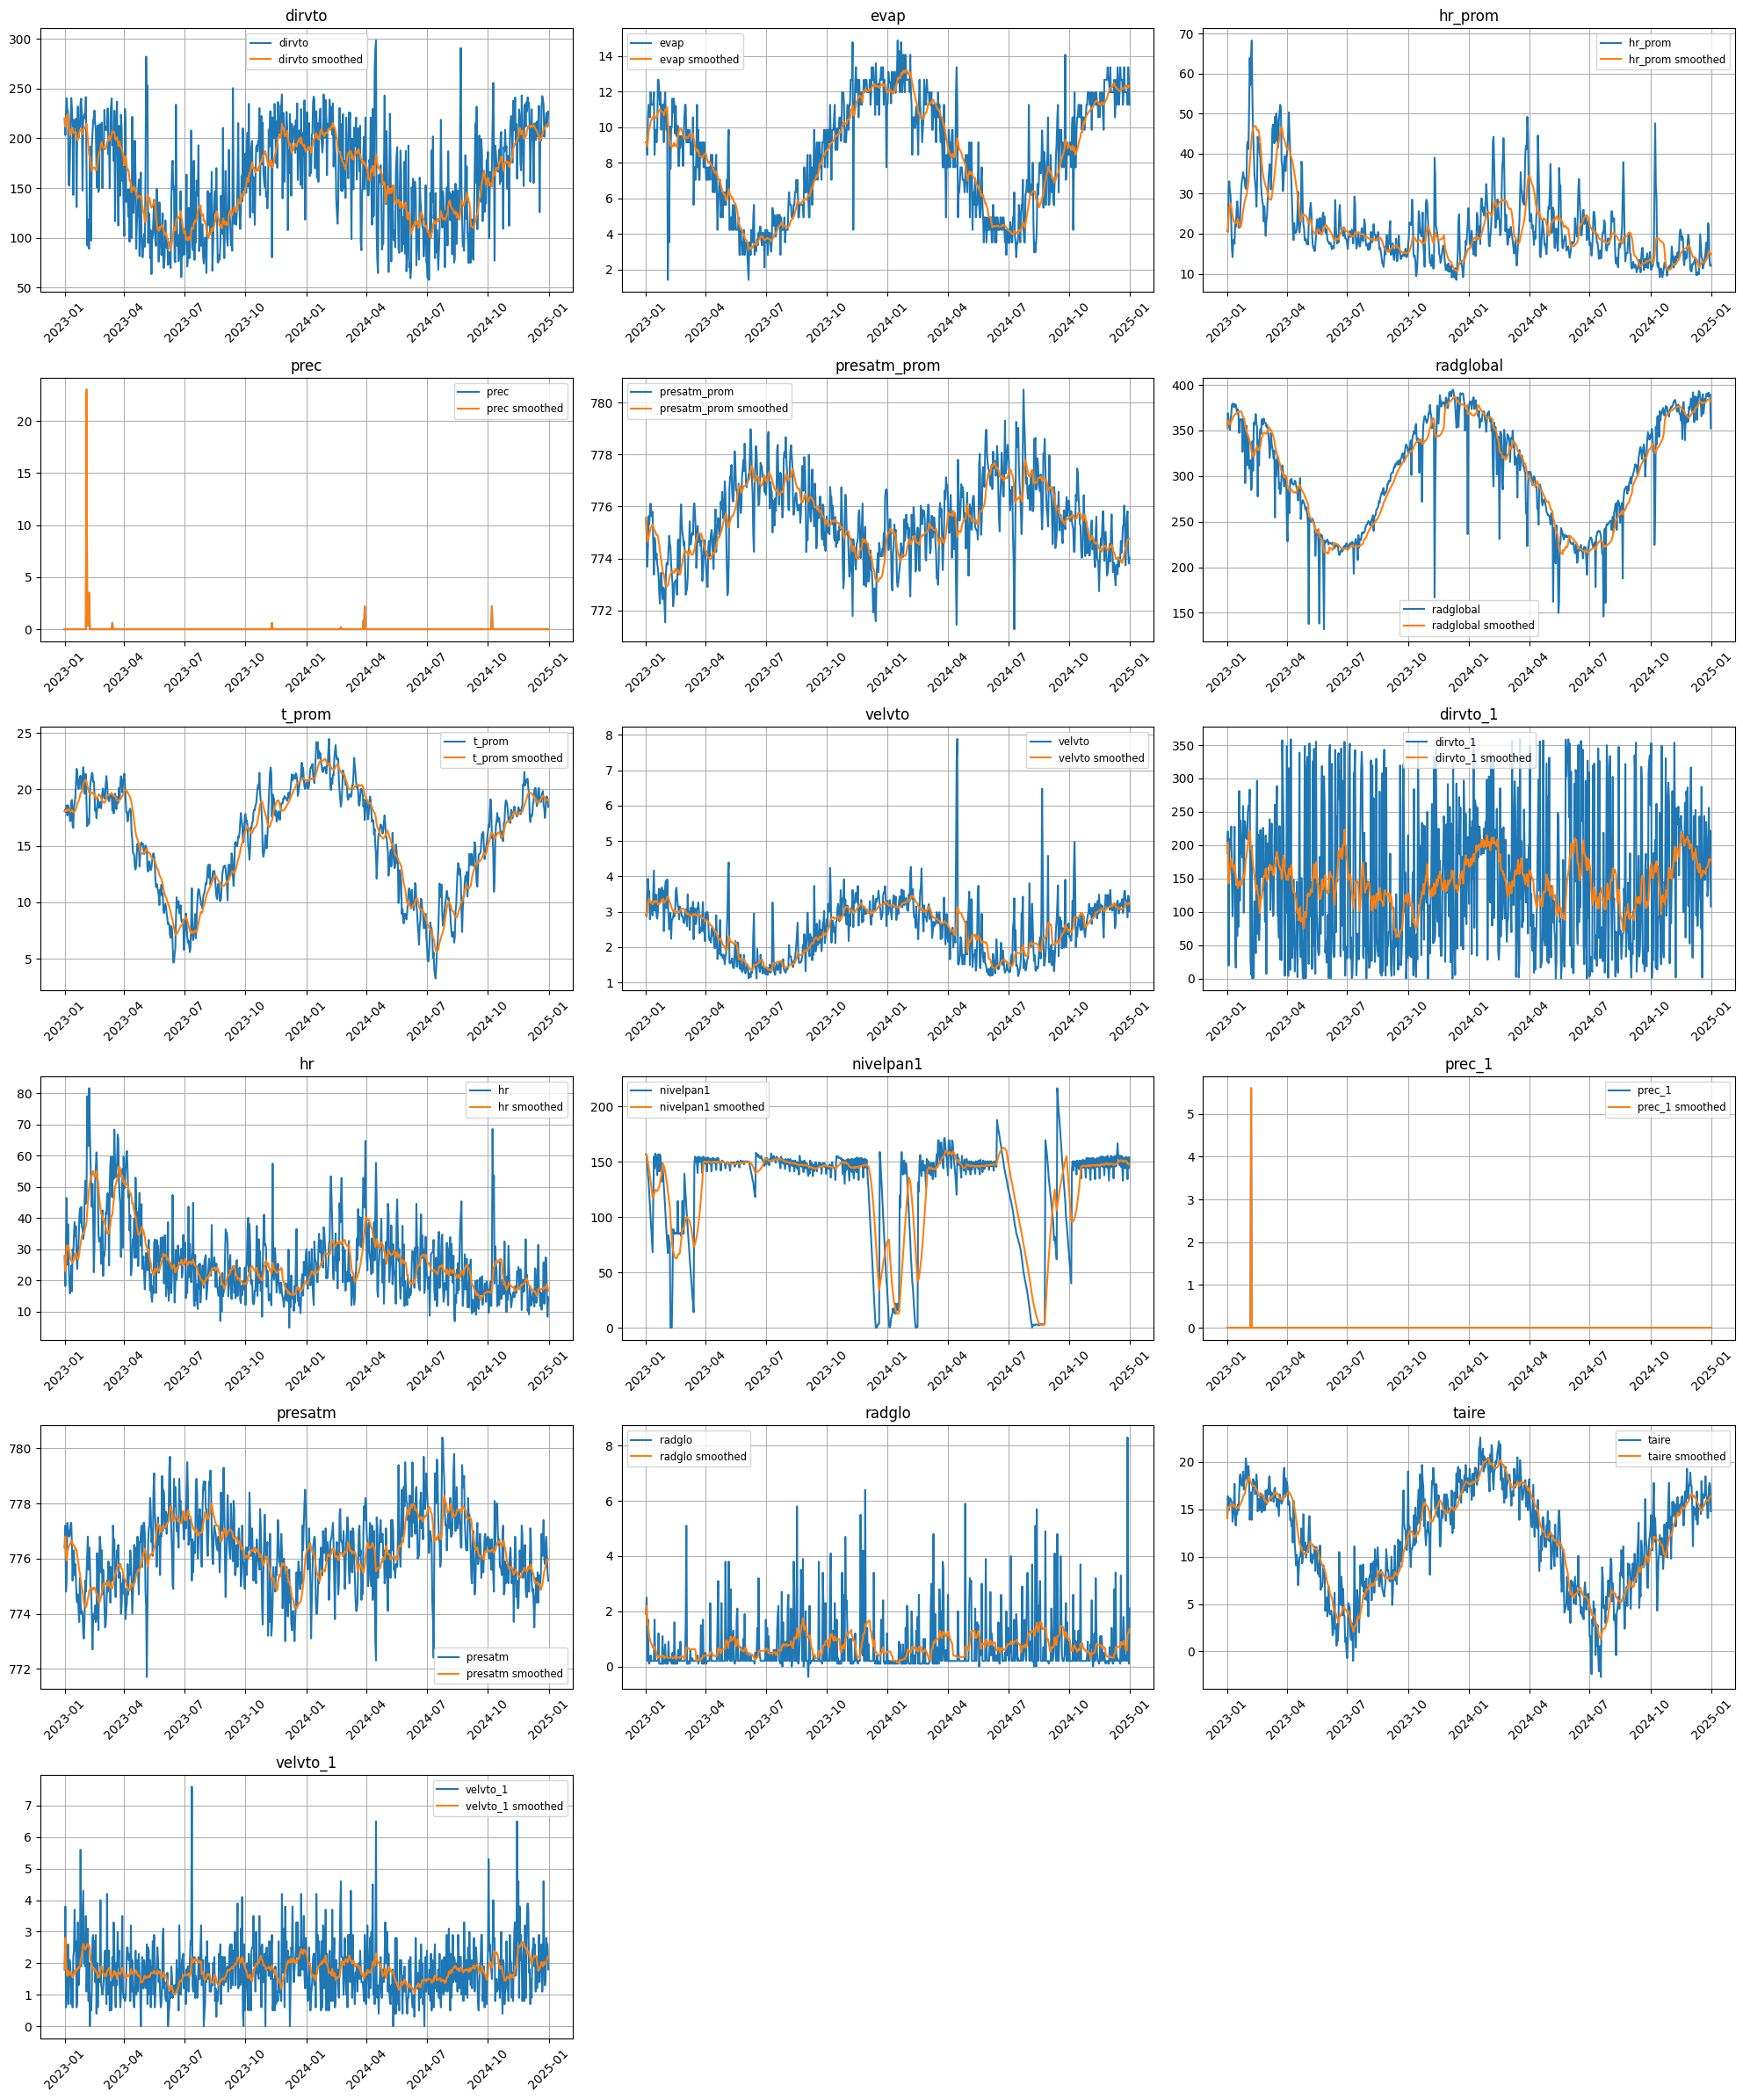

Forecast smooth for EST. METEO. KCL


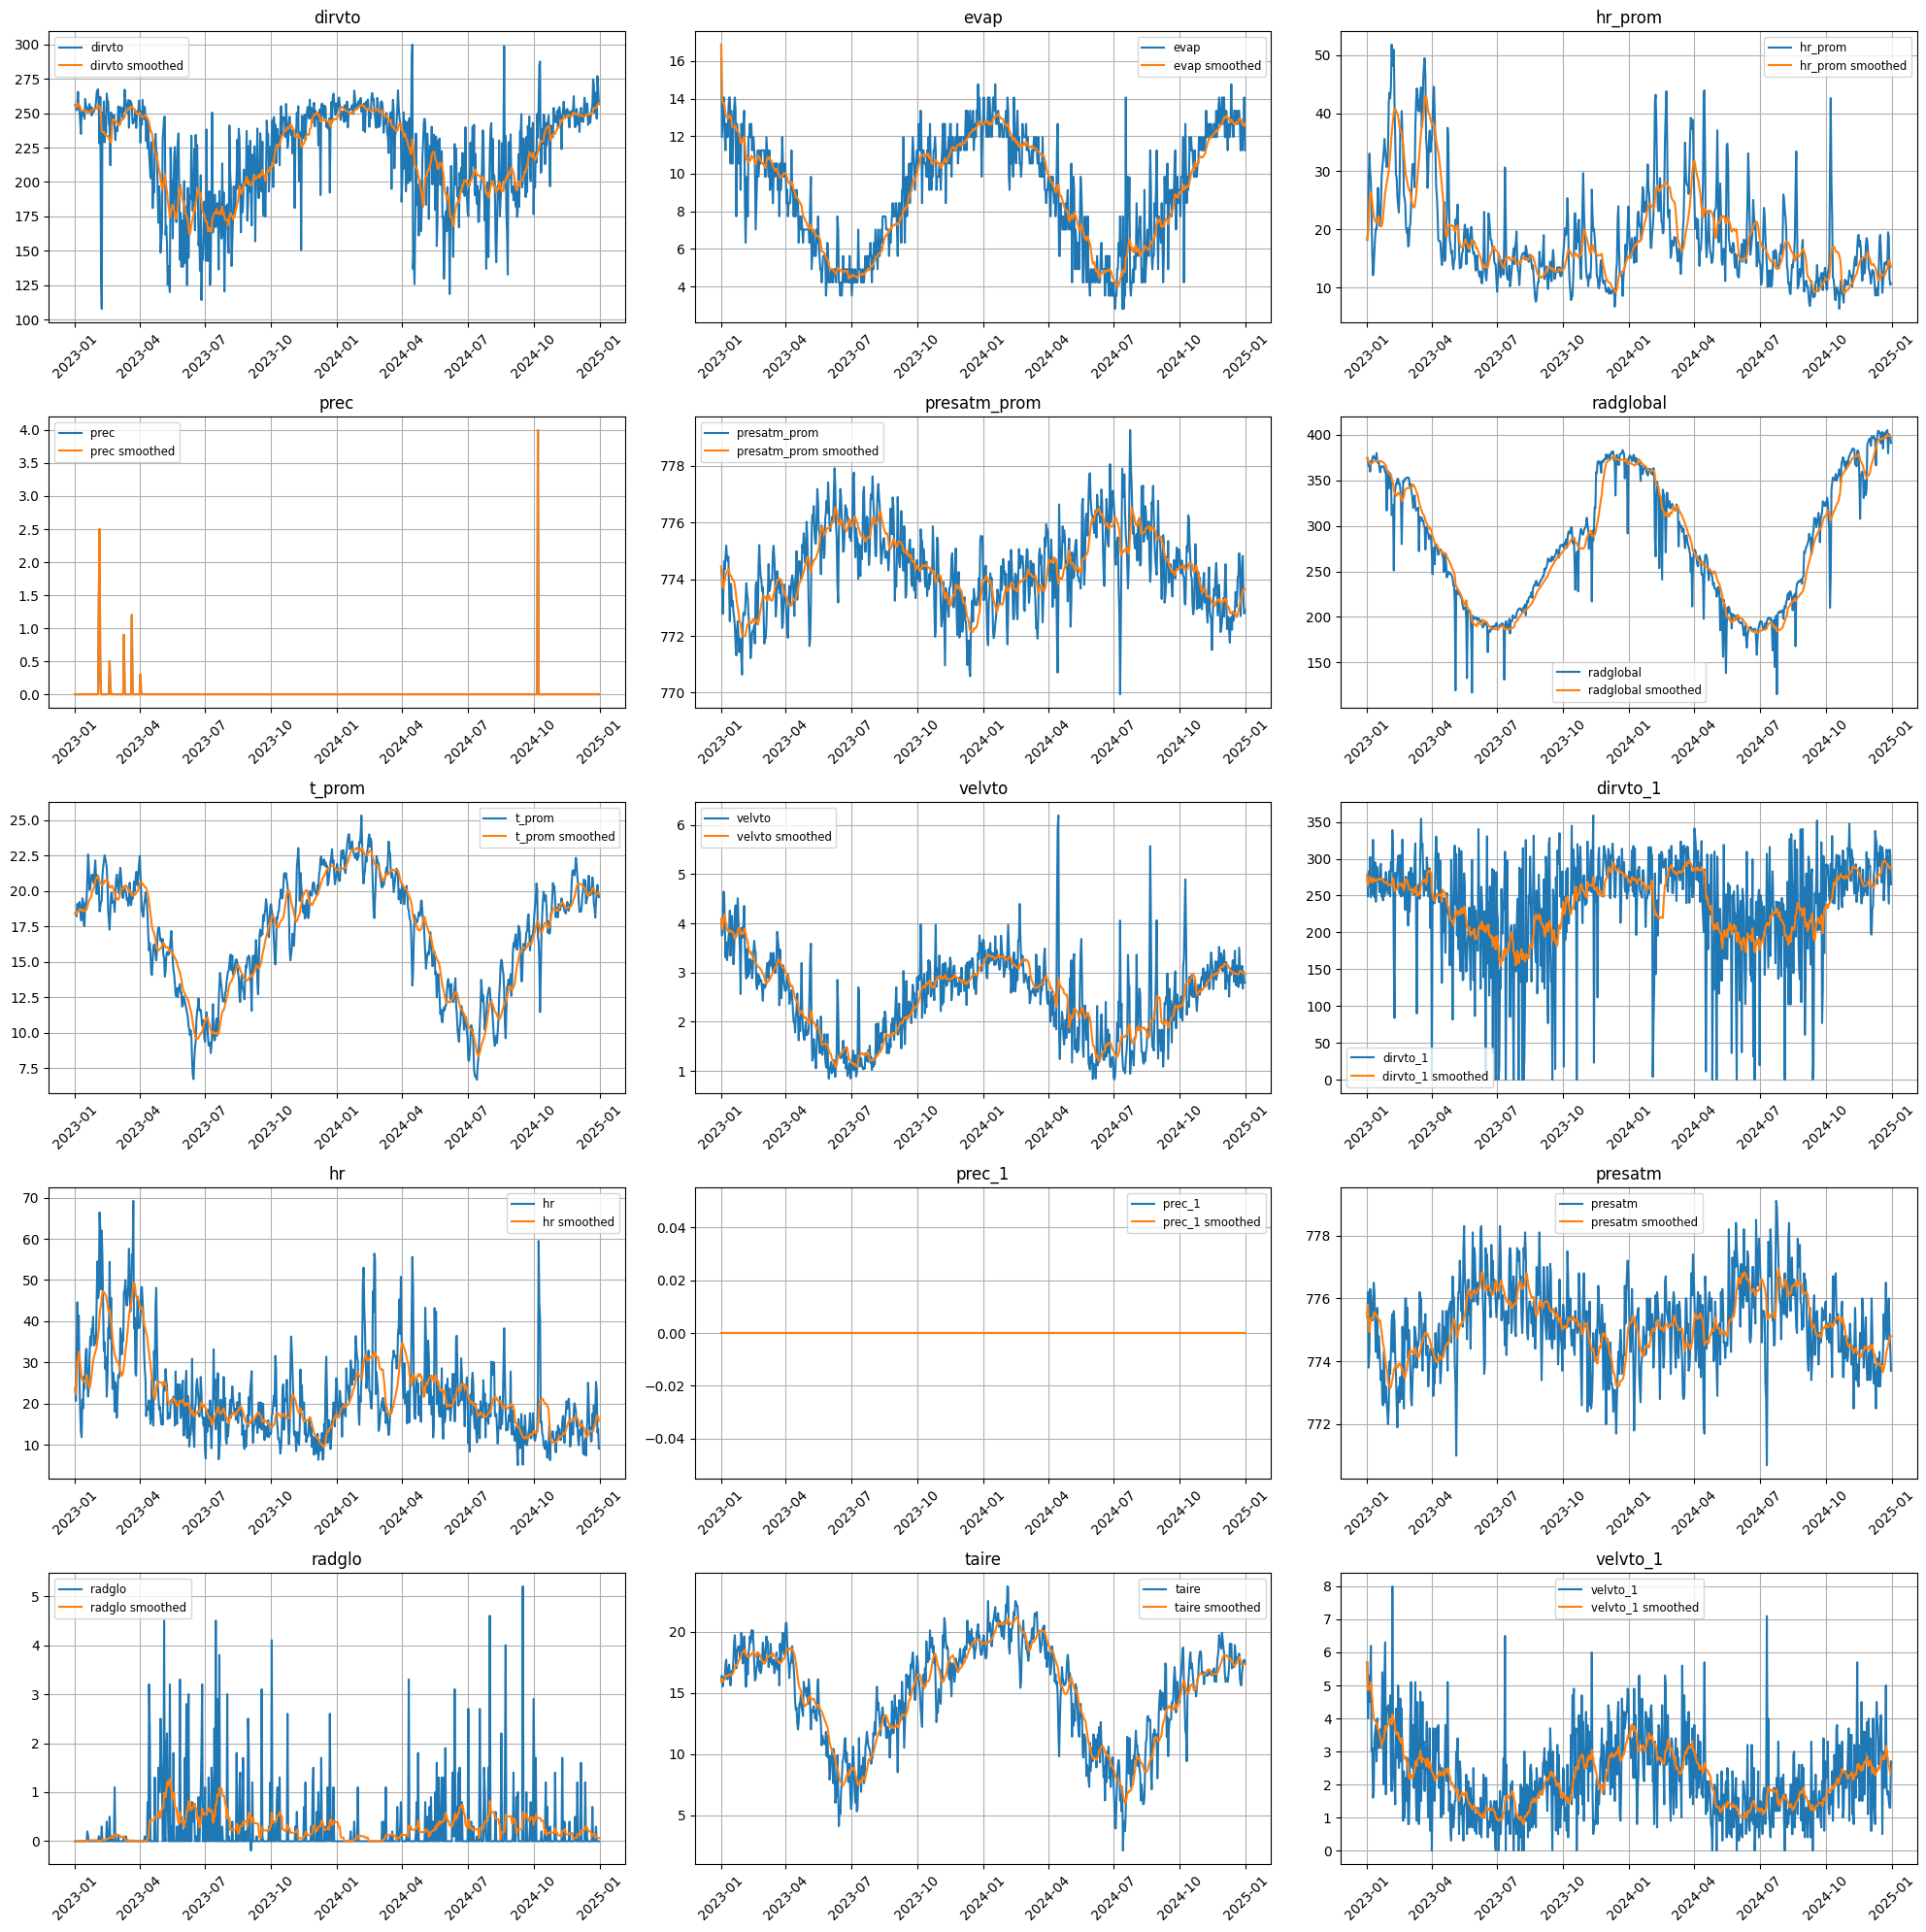

2025-05-04 14:52:24,119 - INFO - 	- Forecasting variables for meteo_id EST. METEO. CHAXA
100%|██████████| 16/16 [00:02<00:00,  5.61it/s]
2025-05-04 14:52:26,976 - INFO - 	- Forecasting variables for meteo_id EST. METEO. KCL
100%|██████████| 16/16 [00:03<00:00,  4.97it/s]
2025-05-04 14:52:30,199 - INFO - 	- Creating new data test with predicted forecasted variables


Forecast predictors for EST. METEO. CHAXA


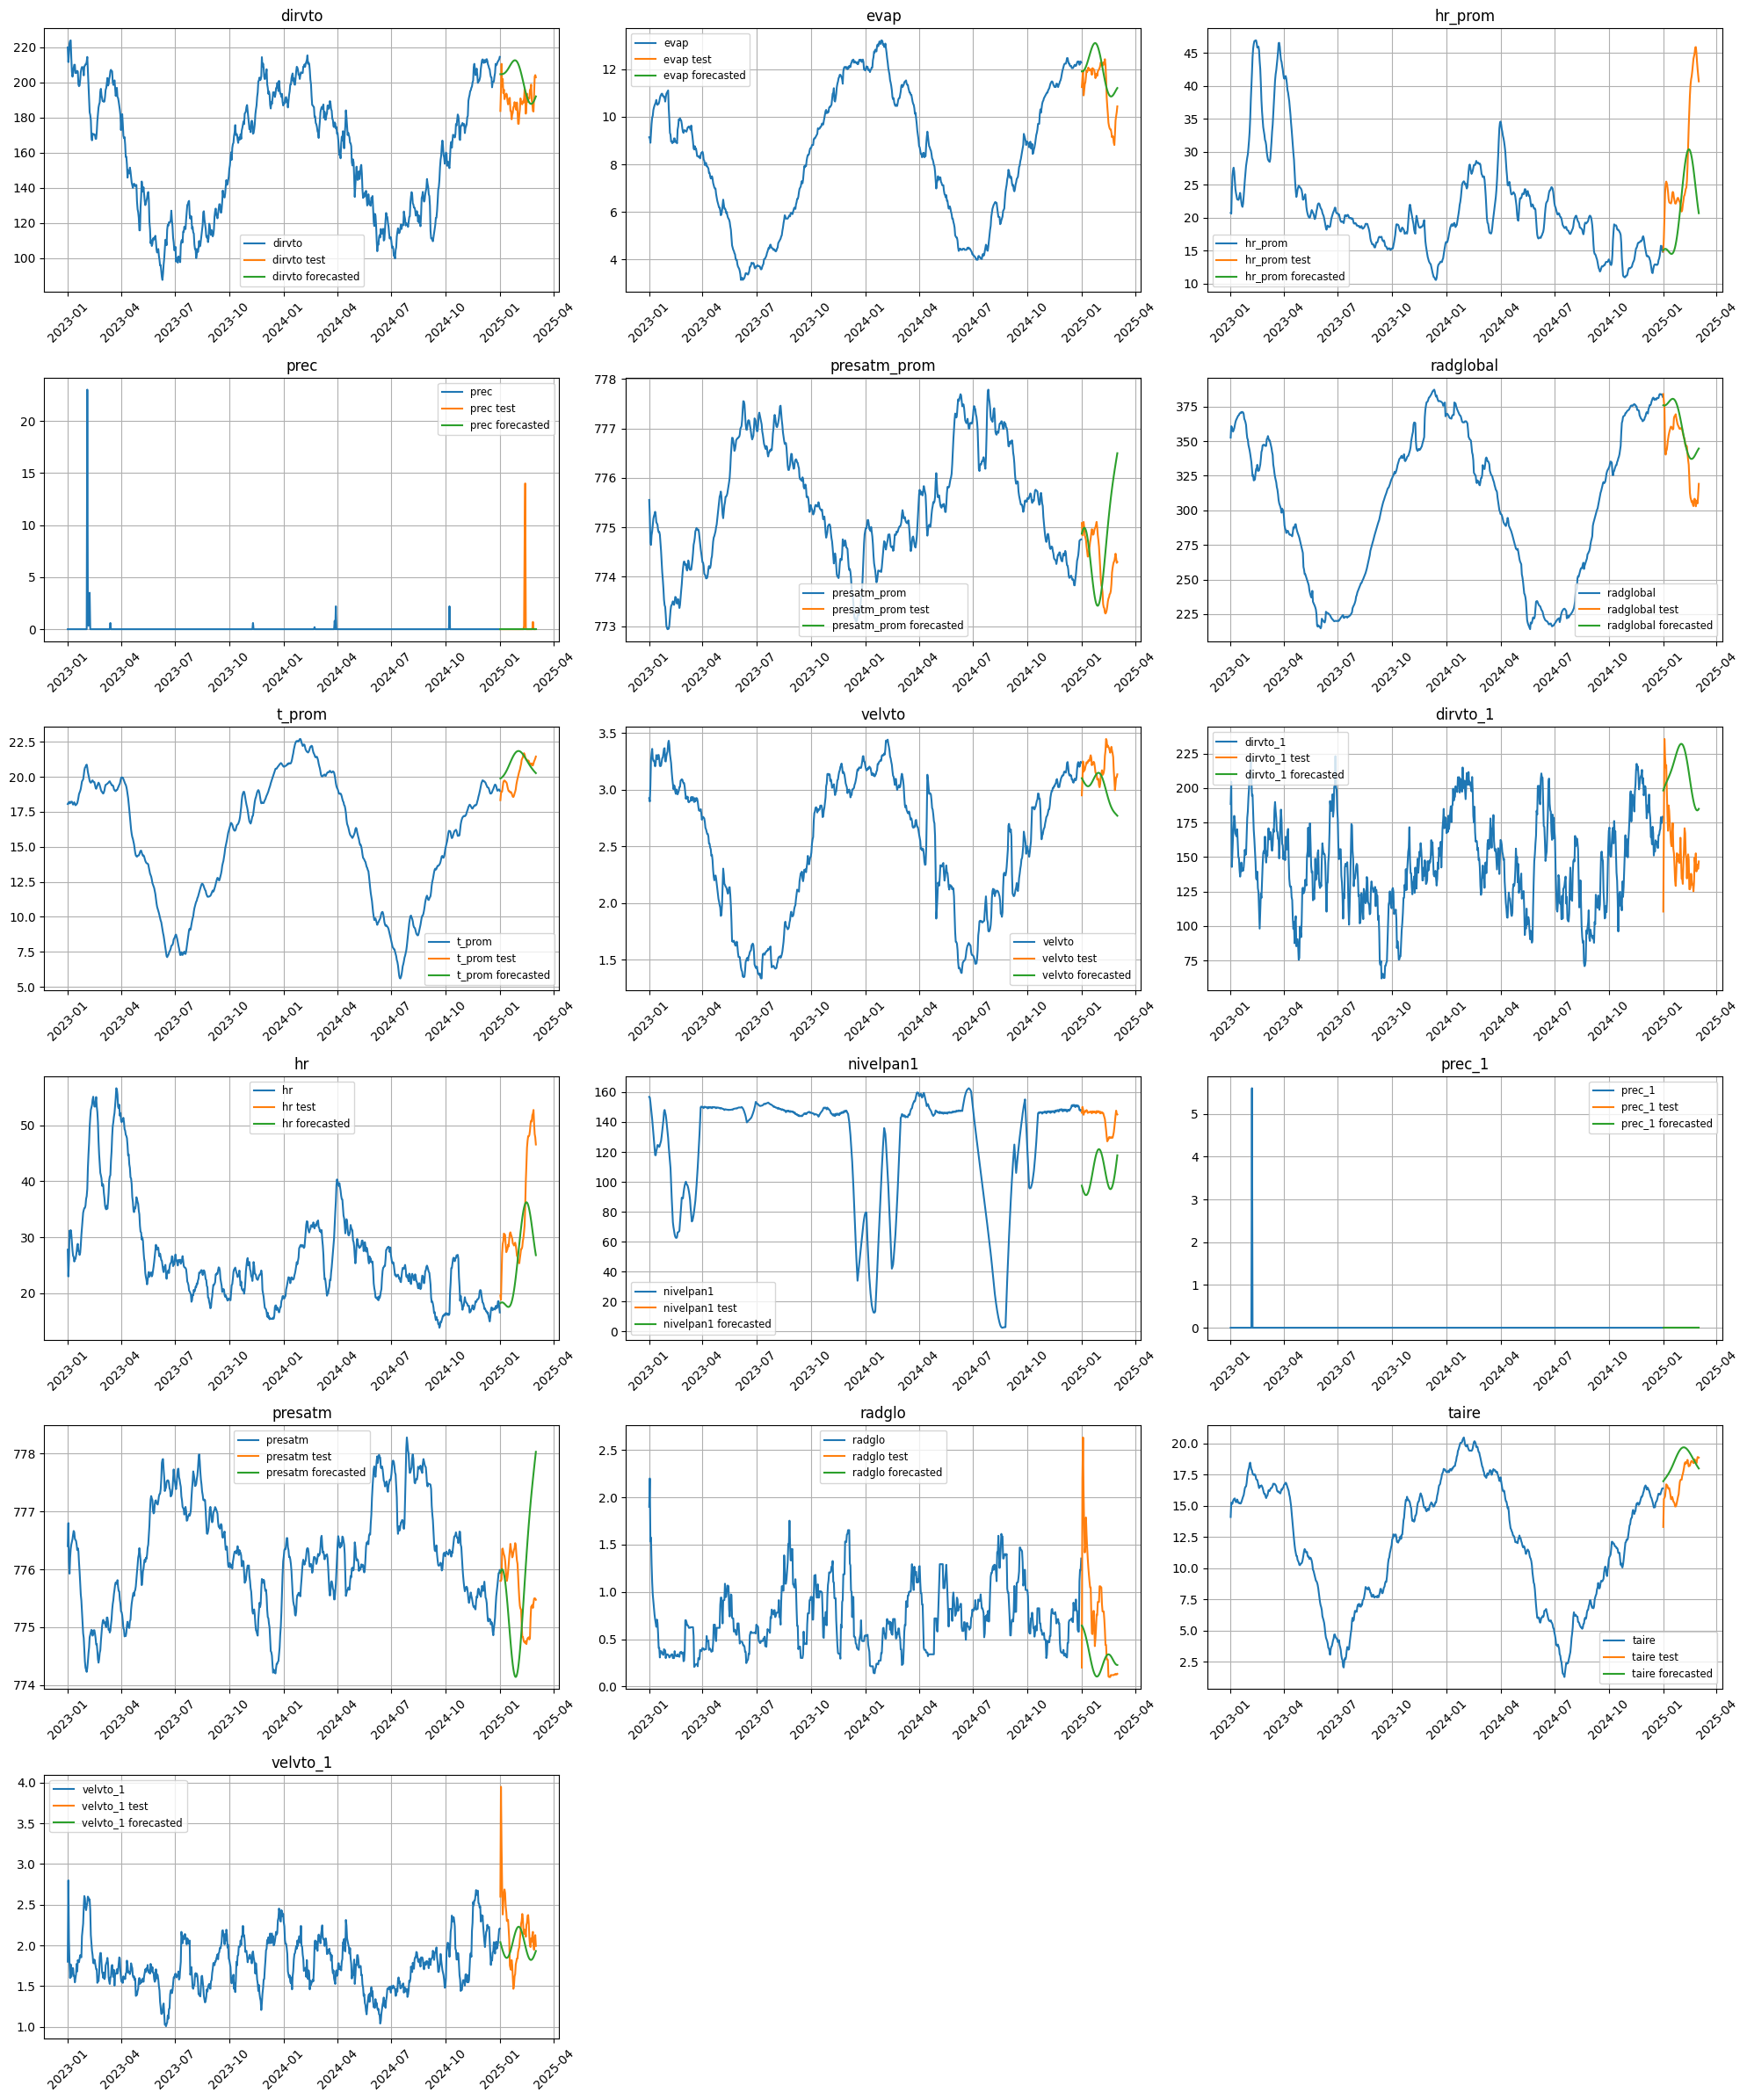

Forecast predictors for EST. METEO. KCL


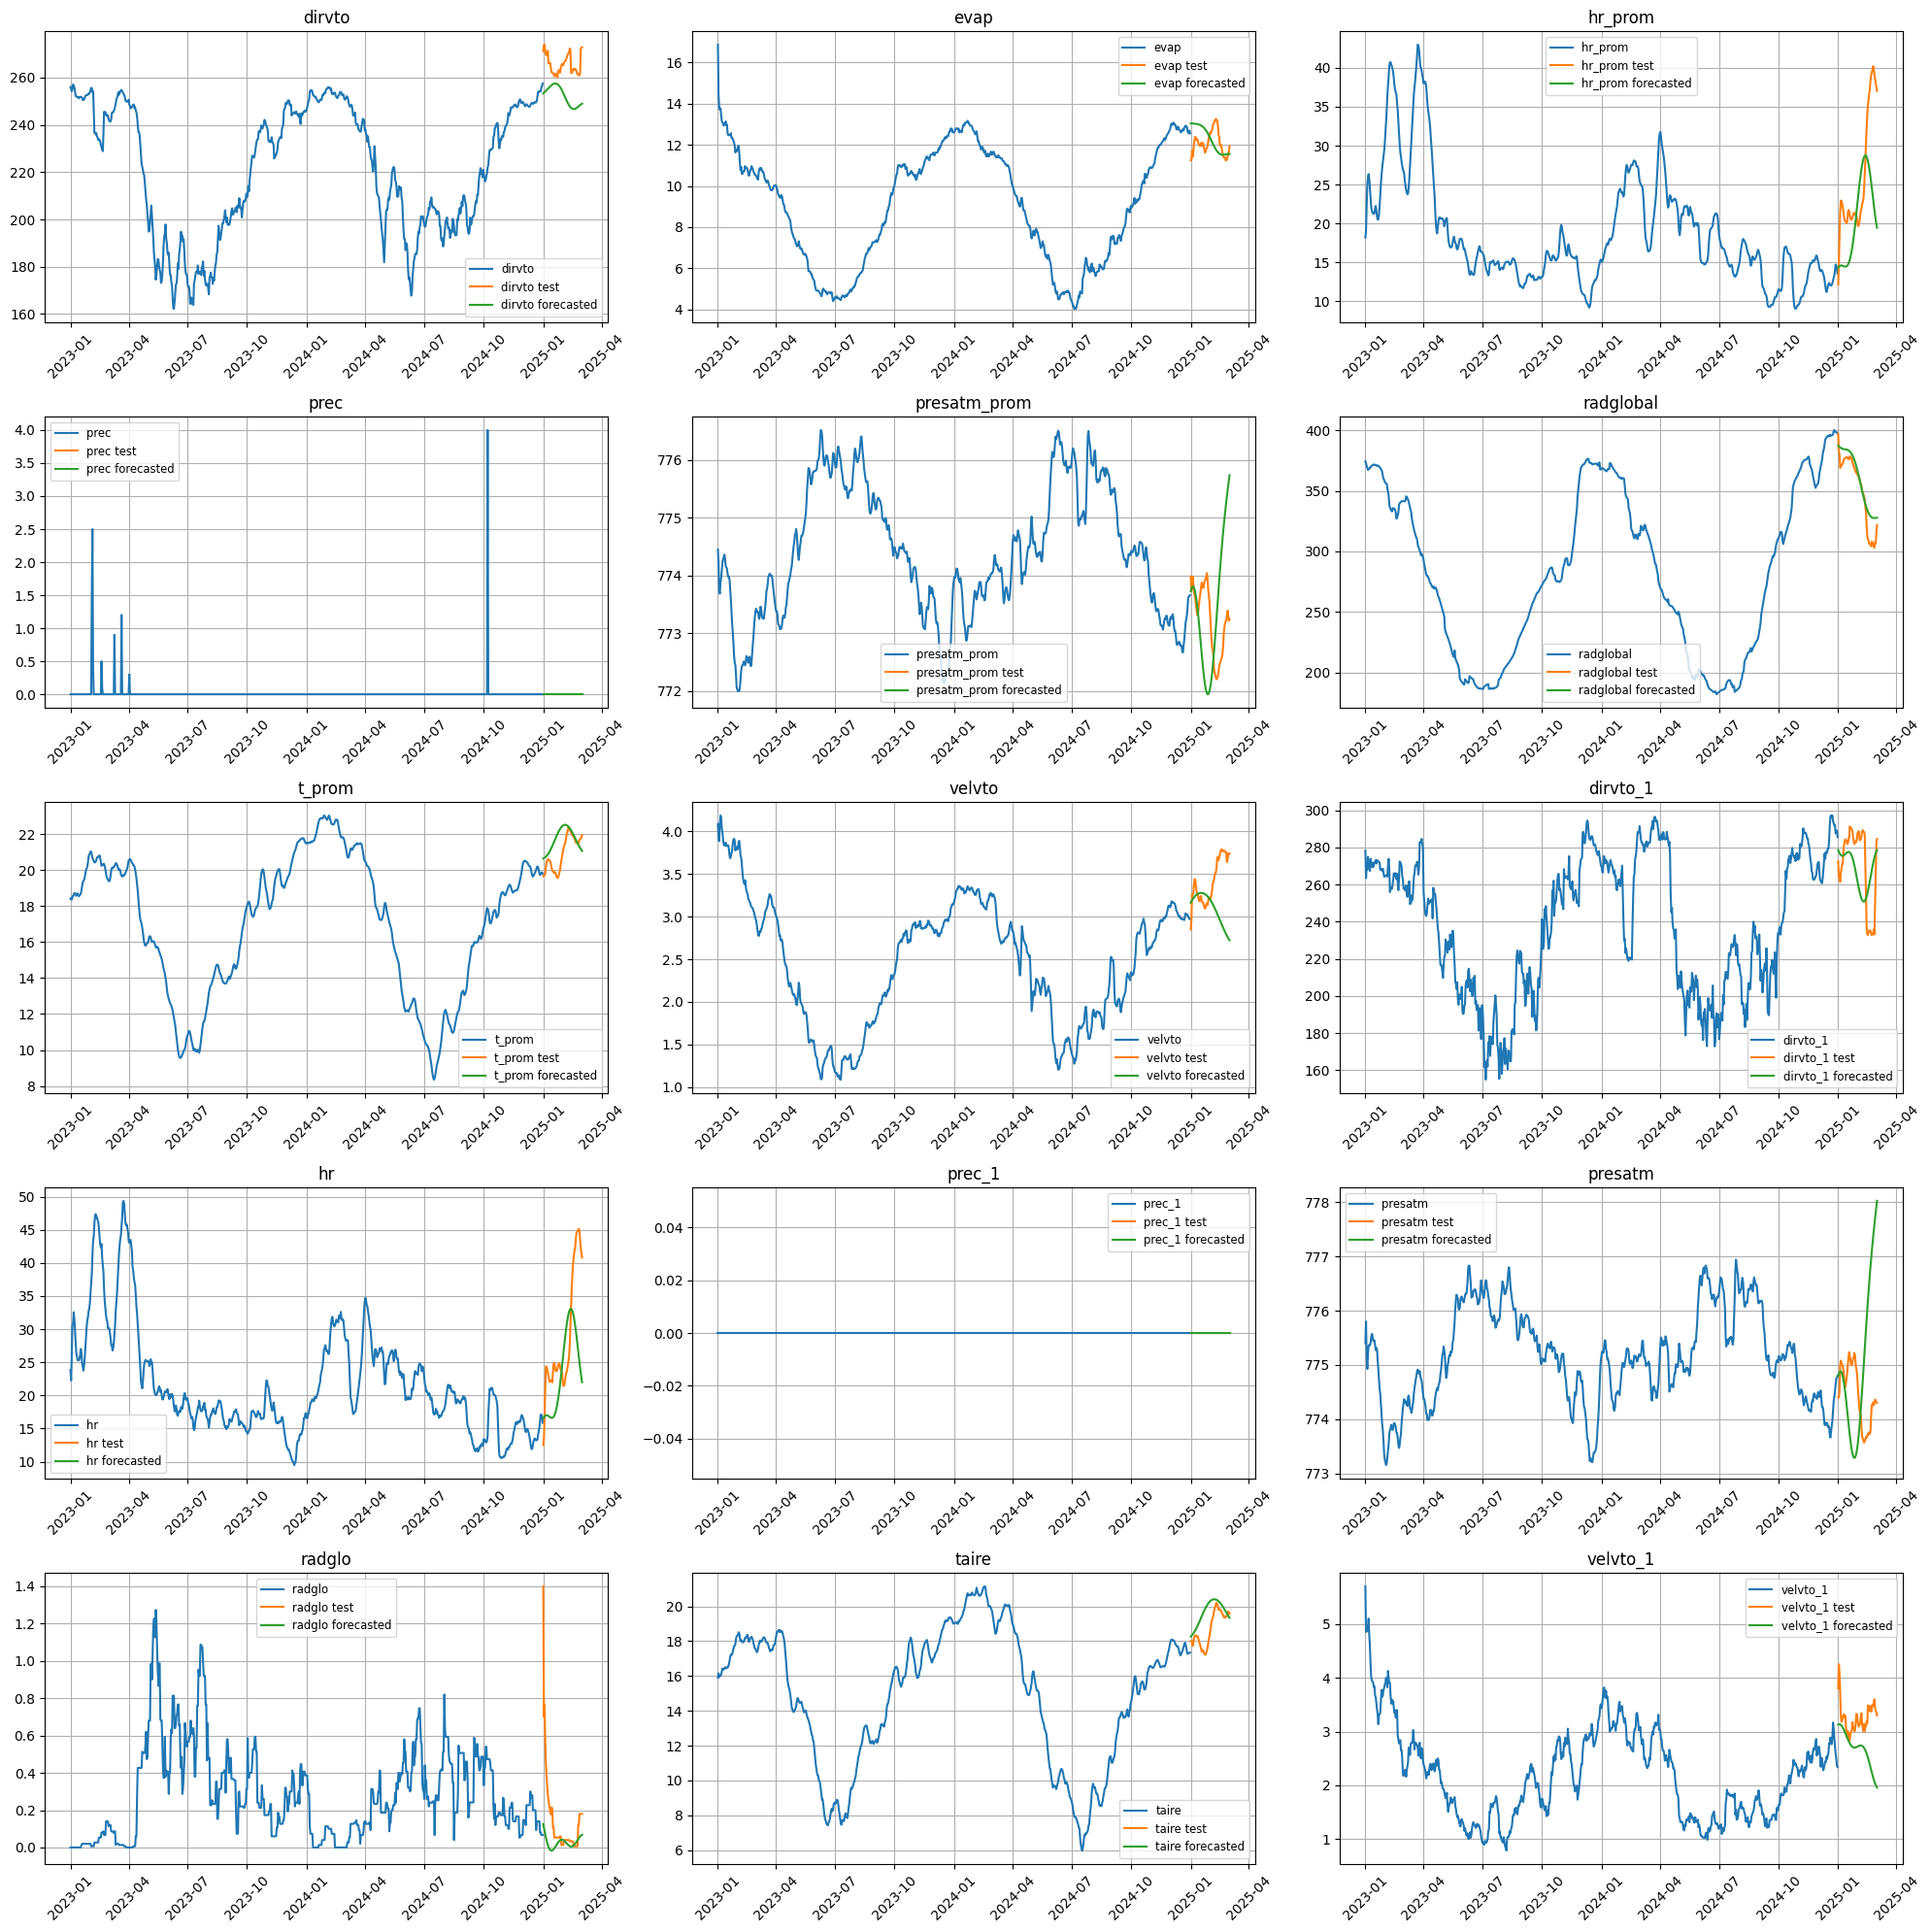

2025-05-04 14:52:35,902 - INFO - - Preprocessing meteo data completed.
2025-05-04 14:52:35,903 - INFO - - Preprocessing wells data.
2025-05-04 14:52:35,928 - INFO - 	- Filling missing manual levels.
2025-05-04 14:52:35,936 - INFO - 	- Dropping continue nulls.
2025-05-04 14:52:35,978 - INFO - 	- Imputing missing values.
100%|██████████| 29/29 [00:00<00:00, 76.68it/s]
2025-05-04 14:52:36,372 - INFO - 	- Clustering wells by level
2025-05-04 14:52:36,386 - INFO - 	  - Finding optimal number of clusters
100%|██████████| 10/10 [00:39<00:00,  3.97s/it]


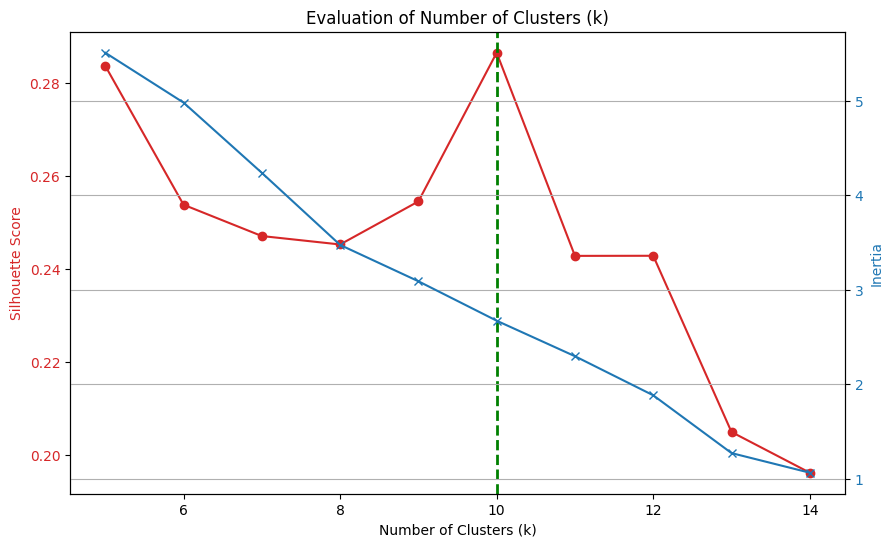

2025-05-04 14:53:16,235 - INFO - 	  - Aplying clusterization


In [ ]:
prepro = Preprocess(
    train_end=date(2024,12,31), 
    bucket_name='sqm-data-bucket', 
    context='vertex'
)
data_train, data_test = prepro.preprocess()

In [ ]:
well_id = 'L4-10'
prepro.plot_inputation(
    data_train[data_train['well_id'].isin([well_id])].set_index('ds'), 
    prepro.inputation_info[well_id]['level'], 'level'
)

In [ ]:
meteo_id = 'EST. METEO. CHAXA'
prepro.plot_inputation(
    prepro.data_meteo[prepro.data_meteo['meteo_id'].isin([meteo_id])].set_index('ds'), 
    prepro.inputation_info[meteo_id]['t_prom'], 't_prom'
)

In [ ]:
prepro.metrics_predictors.sort_values(['meteo_id', 'wMAPE'])